In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,classification_report
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP scores/*.txt")

# List to hold individual DataFrames
dfs = []

# Iterate through each file in the directory
for file in list_dir:
    # Read the file into a DataFrame
    #file_path = os.path.join(directory, filename)
    df = pd.read_csv(file) #, delimiter='\t')  # Assuming tab-separated values
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as CSV
merged_df.to_csv("merged_data.csv", index=False)
dataset=merged_df
dataset


,Unnamed: 0,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,score,Target,Stimulation
0,0,0.033752,0.026832,6.146017e-02,0.030909,0.383788,0.344440,1.000000,1.460269e-07,3.546668e-08,0.064030,0.0,0.0
1,0,0.033134,0.026059,6.314898e-02,0.036732,0.386172,0.350197,1.000000,1.033784e-08,5.968611e-09,0.068225,0.0,0.0
2,0,0.033298,0.026767,6.708787e-02,0.046021,0.386777,0.349459,1.000000,1.959580e-07,9.157318e-08,0.061535,0.0,0.0
3,0,0.033493,0.026519,6.282182e-02,0.030459,0.383312,0.341055,1.000000,9.648819e-08,3.575563e-08,0.061335,0.0,0.0
4,0,0.032974,0.025866,6.308468e-02,0.033693,0.385092,0.347405,1.000000,4.407161e-08,1.683473e-08,0.062659,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0.050616,0.026634,2.284669e-02,0.096958,0.315152,0.163408,0.543656,4.563435e-01,5.968653e-08,0.193786,0.0,0.0
807,0,0.057557,0.028160,5.235134e-02,0.069468,0.321707,0.192334,0.575948,4.240515e-01,1.911695e-07,0.113257,0.0,0.0
808,0,0.053260,0.031083,5.737179e-07,0.108185,0.248023,0.060402,0.445422,5.545780e-01,9.840582e-16,0.284483,0.0,0.0
809,0,0.048749,0.026283,3.671914e-07,0.111340,0.312674,0.154662,0.451368,5.486318e-01,3.613233e-09,0.282560,0.0,0.0


dataset = pd.read_csv('Data after PP/Data')

### Only baseline

In [66]:
dataset = dataset[dataset['Stimulation'] != 1]
dataset

,Unnamed: 0,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,Target,Stimulation
0,0,0.029989,0.023791,0.050000,0.025455,0.301780,0.317919,0.814444,0.185555,4.704015e-07,0.0,1.0
1,0,0.030000,0.023087,0.050000,0.025142,0.273312,0.328372,0.813396,0.186604,3.058176e-12,0.0,1.0
2,0,0.028645,0.024061,0.050000,0.029190,0.180386,0.221539,0.804252,0.195748,2.771986e-30,0.0,1.0
3,0,0.030000,0.024694,0.050000,0.017556,0.272991,0.290797,0.918604,0.081396,5.773332e-11,0.0,1.0
4,0,0.030000,0.024102,0.051366,0.010000,0.255269,0.292689,0.917414,0.082586,2.747613e-15,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
432,0,0.030000,0.022657,0.050000,0.027277,0.100001,0.057532,0.583097,0.257282,1.596210e-01,0.0,1.0
433,0,0.030000,0.023670,0.050000,0.040929,0.240133,0.240503,0.661024,0.338976,5.419047e-10,0.0,1.0
434,0,0.030000,0.023743,0.050000,0.046941,0.221648,0.150496,0.660084,0.339913,2.286516e-06,0.0,1.0
435,0,0.030000,0.023481,0.050000,0.024746,0.100007,0.050629,0.634492,0.266342,9.916566e-02,0.0,1.0


### Dropping stimulation column

In [3]:
dataset=dataset.drop(['Stimulation'],axis=1)
dataset=dataset.drop(['score'],axis=1)
dataset = dataset.drop(['Unnamed: 0'],axis=1)

In [4]:
dataset['Target'].value_counts()

0.0    406
1.0    405
Name: Target, dtype: int64

In [5]:
dataset['Target'].value_counts(1)

0.0    0.500617
1.0    0.499383
Name: Target, dtype: float64

In [6]:
X = dataset.drop(['Target'],axis=1)
y= dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

# Histograms

In [5]:
dataset.columns[1]

'mu1'

In [15]:
dataset0

,Unnamed: 0,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,score,Target,Stimulation
58,0,0.105957,0.050000,8.060722e-42,0.181616,0.200010,0.323209,0.380190,0.525442,9.436820e-02,0.291926,1.0,1.0
59,0,0.114668,0.048093,5.122741e-02,0.111309,0.394090,0.142243,0.384788,0.507604,1.076081e-01,0.169267,1.0,1.0
60,0,0.100885,0.041547,4.065138e-31,0.173667,0.200002,0.352466,0.390406,0.505867,1.037267e-01,0.286420,1.0,1.0
61,0,0.107661,0.050000,6.244328e-22,0.160335,0.200001,0.344301,0.426871,0.455724,1.174041e-01,0.264862,1.0,1.0
62,0,0.117868,0.050000,5.964132e-02,0.201092,0.200003,0.474878,0.181230,0.634385,1.843850e-01,0.309660,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,0,0.038119,0.023937,5.037976e-02,0.053025,0.352215,0.311998,0.649746,0.350254,6.843468e-09,0.088155,0.0,1.0
433,0,0.035229,0.023905,4.997615e-02,0.034635,0.364219,0.341517,0.712101,0.287899,9.511599e-09,0.048678,0.0,1.0
434,0,0.037307,0.023948,5.253006e-02,0.034503,0.376685,0.346167,0.739018,0.260974,8.418052e-06,0.044301,0.0,1.0
435,0,0.037905,0.024317,5.305191e-02,0.033640,0.360490,0.323838,0.718340,0.281660,2.222192e-08,0.042679,0.0,1.0


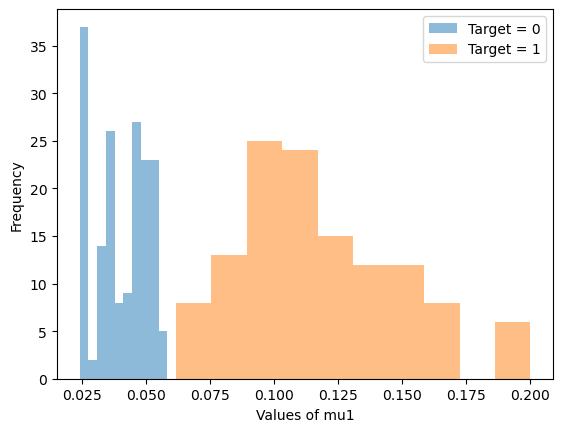

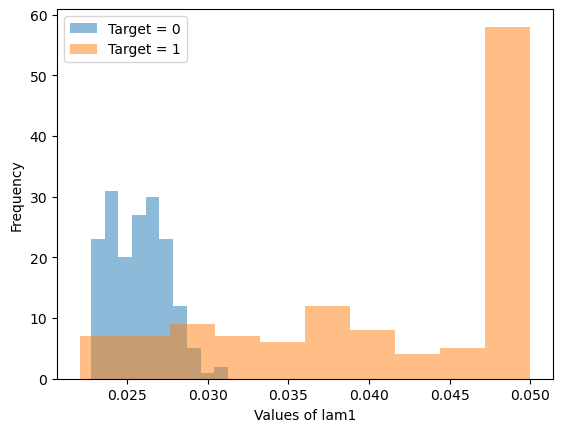

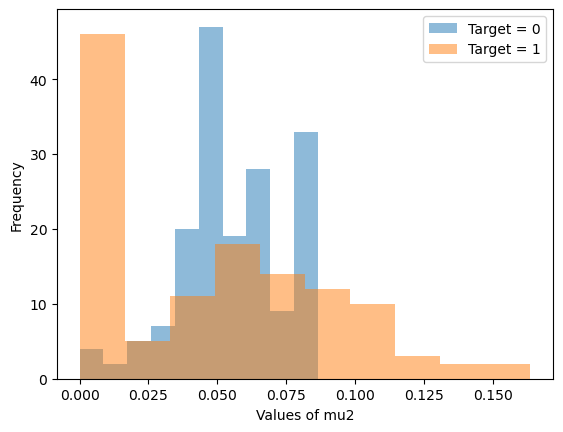

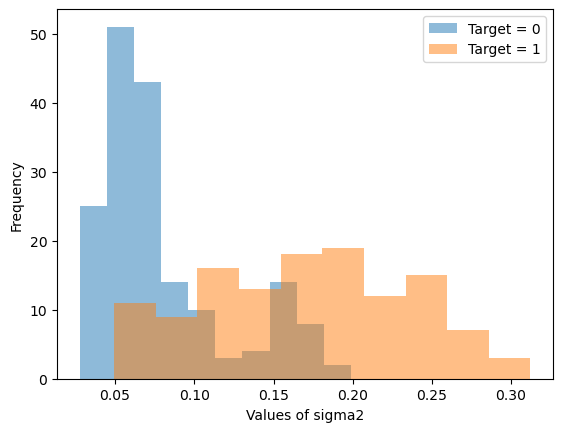

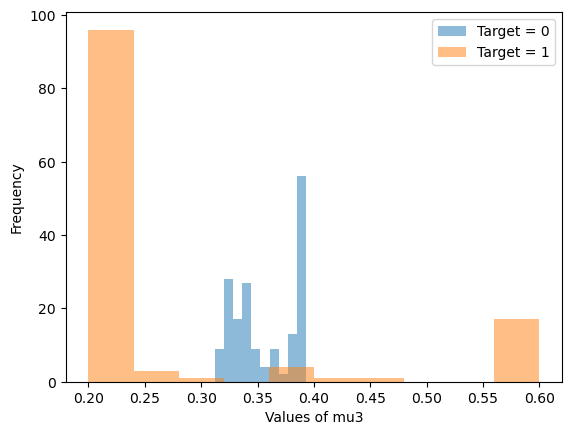

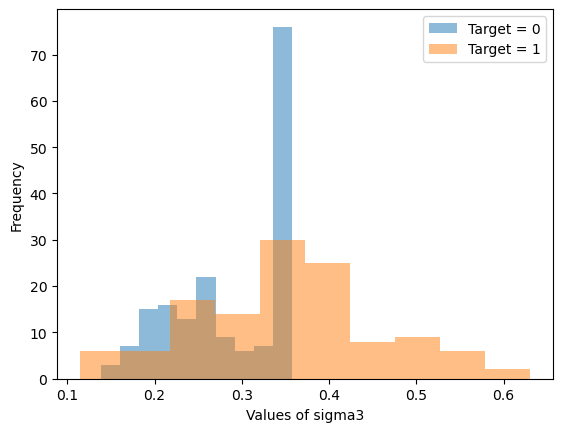

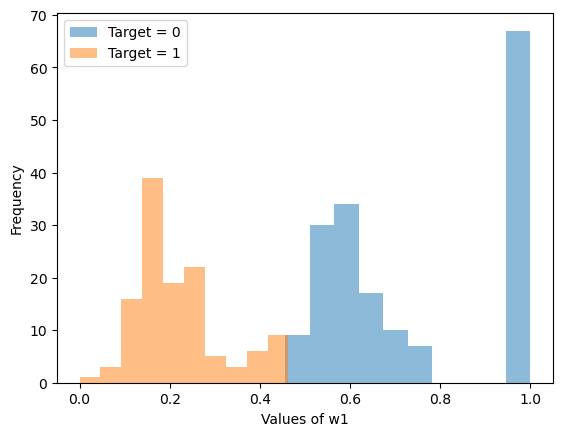

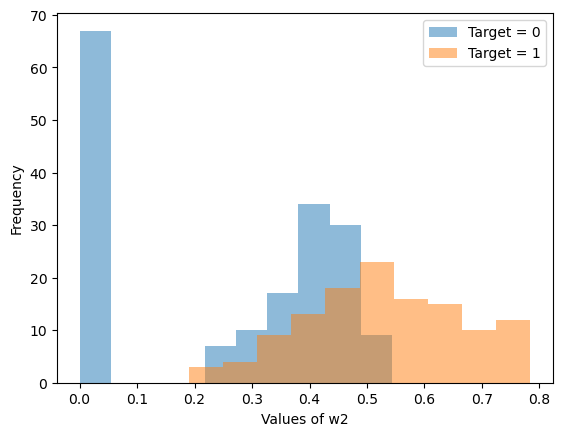

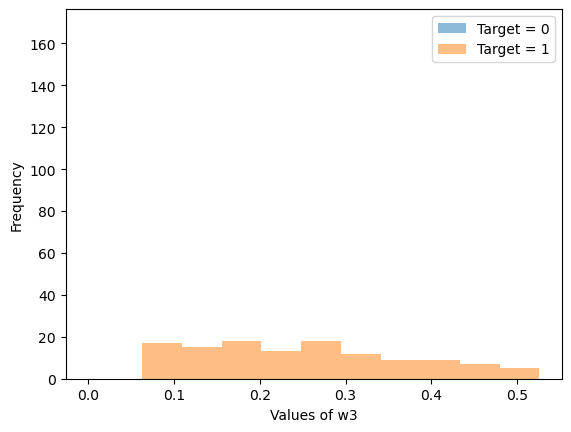

In [16]:
dataset0= dataset[dataset['Stimulation'] == 1]
for k in range(1,len(dataset0.columns)-3):
    feature=dataset0.columns[k]

    target_0 = dataset0[dataset0['Target'] == 0][feature]

    # Filter rows where 'Target' is 1
    target_1 = dataset0[dataset0['Target'] == 1][feature]

    # Plot histograms
    plt.hist(target_0, alpha=0.5, label='Target = 0')  # alpha specifies the transparency of the plot
    plt.hist(target_1, alpha=0.5, label='Target = 1')

    # Add labels and legend
    plt.xlabel(f'Values of {feature}')
    plt.ylabel('Frequency')
    plt.legend()
    #plt.savefig(f'POSTSTIMULATION_{feature}distribution_target0vs1')
    
    plt.show()

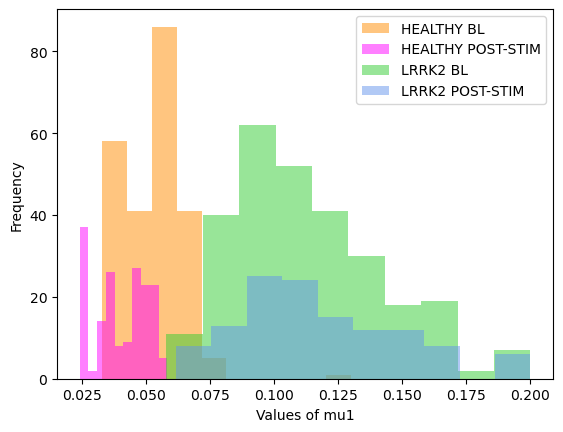

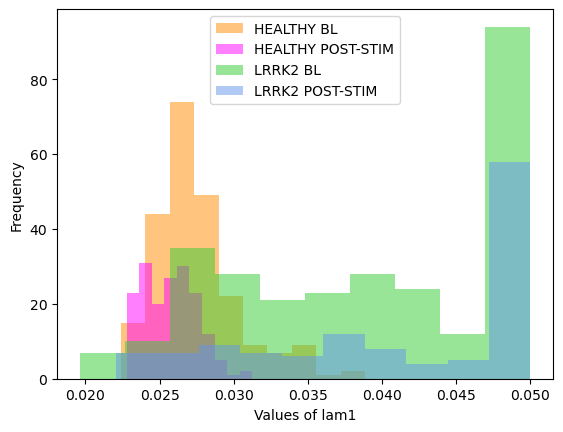

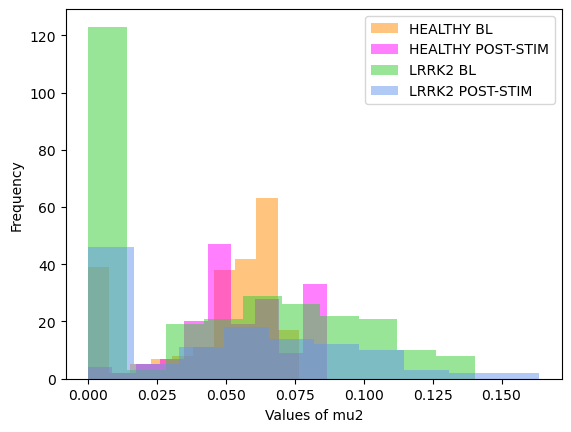

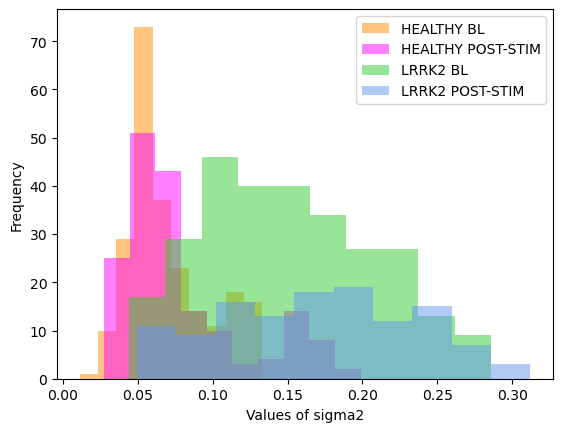

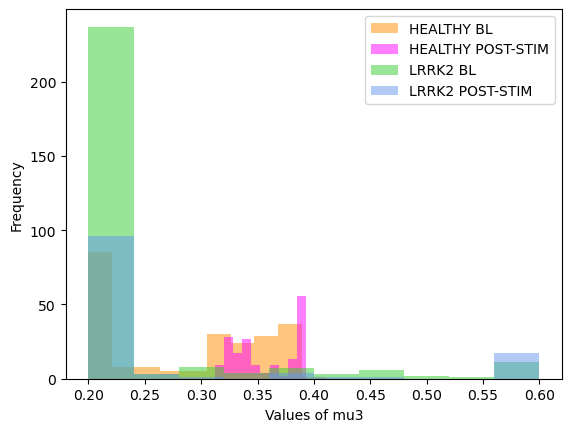

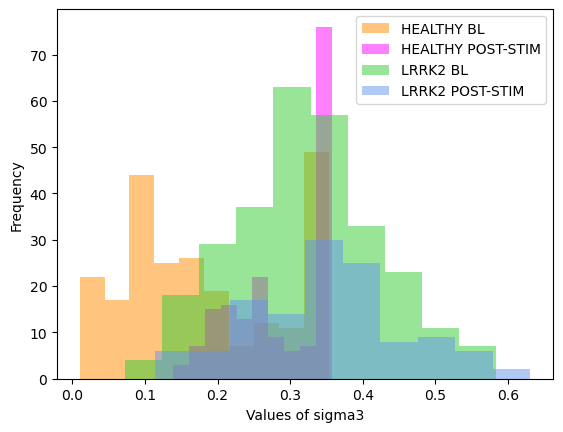

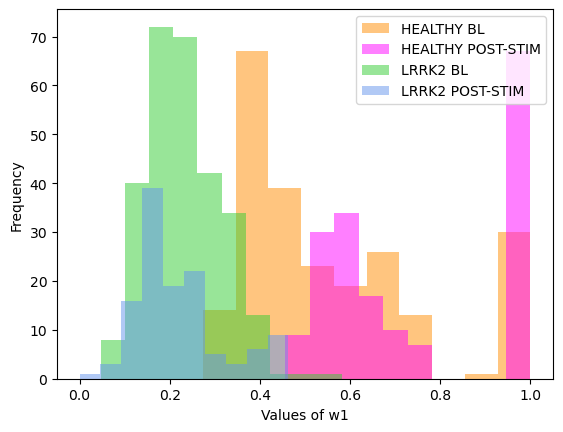

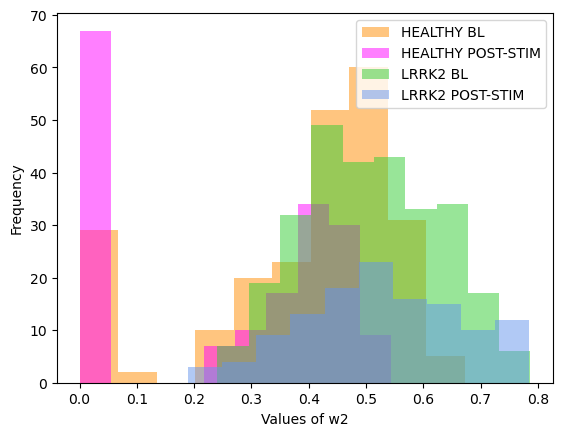

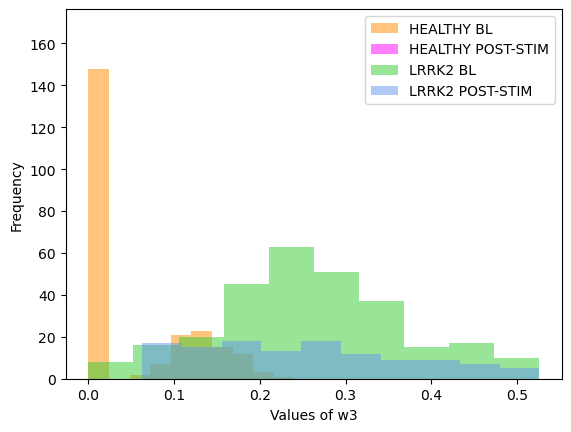

In [23]:
dataset1= dataset[dataset['Target'] == 0]
dataset2= dataset[dataset['Target'] == 1]
for k in range(1,len(dataset1.columns)-3):
    feature=dataset1.columns[k]

    target_0 = dataset1[dataset1['Stimulation'] == 0][feature]
    target_1 = dataset1[dataset1['Stimulation'] == 1][feature]
    target_2 = dataset2[dataset2['Stimulation'] == 0][feature]
    target_3 = dataset2[dataset2['Stimulation'] == 1][feature]

    # Plot histograms
    plt.hist(target_0, alpha=0.5, label='HEALTHY BL', color='darkorange')  # alpha specifies the transparency of the plot
    plt.hist(target_1, alpha=0.5, label='HEALTHY POST-STIM', color='magenta')
    plt.hist(target_2, alpha=0.5, label='LRRK2 BL', color='limegreen')
    plt.hist(target_3, alpha=0.5, label='LRRK2 POST-STIM',color='cornflowerblue')
    
    # Add labels and legend
    plt.xlabel(f'Values of {feature}')
    plt.ylabel('Frequency')
    plt.legend()
    #plt.savefig(f'{feature}distribution')
    
    plt.show()

In [67]:
HEALTHY=dataset[dataset['Target'] != 1]
LRRK2=dataset[dataset['Target'] != 0]
HEALTHY_BL = dataset[(dataset['Target'] != 1) & (dataset['Stimulation']!=1)]
HEALTHY_BL=HEALTHY_BL.drop(['Unnamed: 0'],axis=1)

LRRK2_BL = dataset[(dataset['Target'] != 0)&(dataset['Stimulation']!=1)]
LRRK2_BL=LRRK2_BL.drop(['Unnamed: 0'],axis=1)

HEALTHY_ST = dataset[(dataset['Target']!=1)&(dataset['Stimulation'] != 0)]
HEALTHY_ST=HEALTHY_ST.drop(['Unnamed: 0'],axis=1)
LRRK2_ST = dataset[(dataset['Target']!=0)&(dataset['Stimulation'] != 0)]
LRRK2_ST=LRRK2_ST.drop(['Unnamed: 0'],axis=1)

w1:  0.5586 ± 0.2080
w2:  0.3924 ± 0.1762
w3:  0.0490 ± 0.0680
mu1:  0.0529 ± 0.0122
lambda:  0.0275 ± 0.0028
mu2:  0.0460 ± 0.0239
sigma2:  0.0692 ± 0.0270
mu3:  0.2853 ± 0.0735
sigma3:  0.1812 ± 0.1098
w1:  0.7523 ± 0.2040
w2:  0.2477 ± 0.2040
w3:  0.0000 ± 0.0000
mu1:  0.0402 ± 0.0102
lambda:  0.0257 ± 0.0018
mu2:  0.0560 ± 0.0192
sigma2:  0.0789 ± 0.0412
mu3:  0.3571 ± 0.0279
sigma3:  0.2884 ± 0.0655
w1:  0.2334 ± 0.0826
w2:  0.5067 ± 0.1176
w3:  0.2599 ± 0.1068
mu1:  0.1132 ± 0.0300
lambda:  0.0393 ± 0.0093
mu2:  0.0430 ± 0.0434
sigma2:  0.1508 ± 0.0569
mu3:  0.2371 ± 0.0959
sigma3:  0.3221 ± 0.0993
w1:  0.2195 ± 0.0959
w2:  0.5287 ± 0.1380
w3:  0.2519 ± 0.1228
mu1:  0.1173 ± 0.0321
lambda:  0.0416 ± 0.0092
mu2:  0.0470 ± 0.0437
sigma2:  0.1716 ± 0.0639
mu3:  0.2678 ± 0.1401
sigma3:  0.3528 ± 0.1069


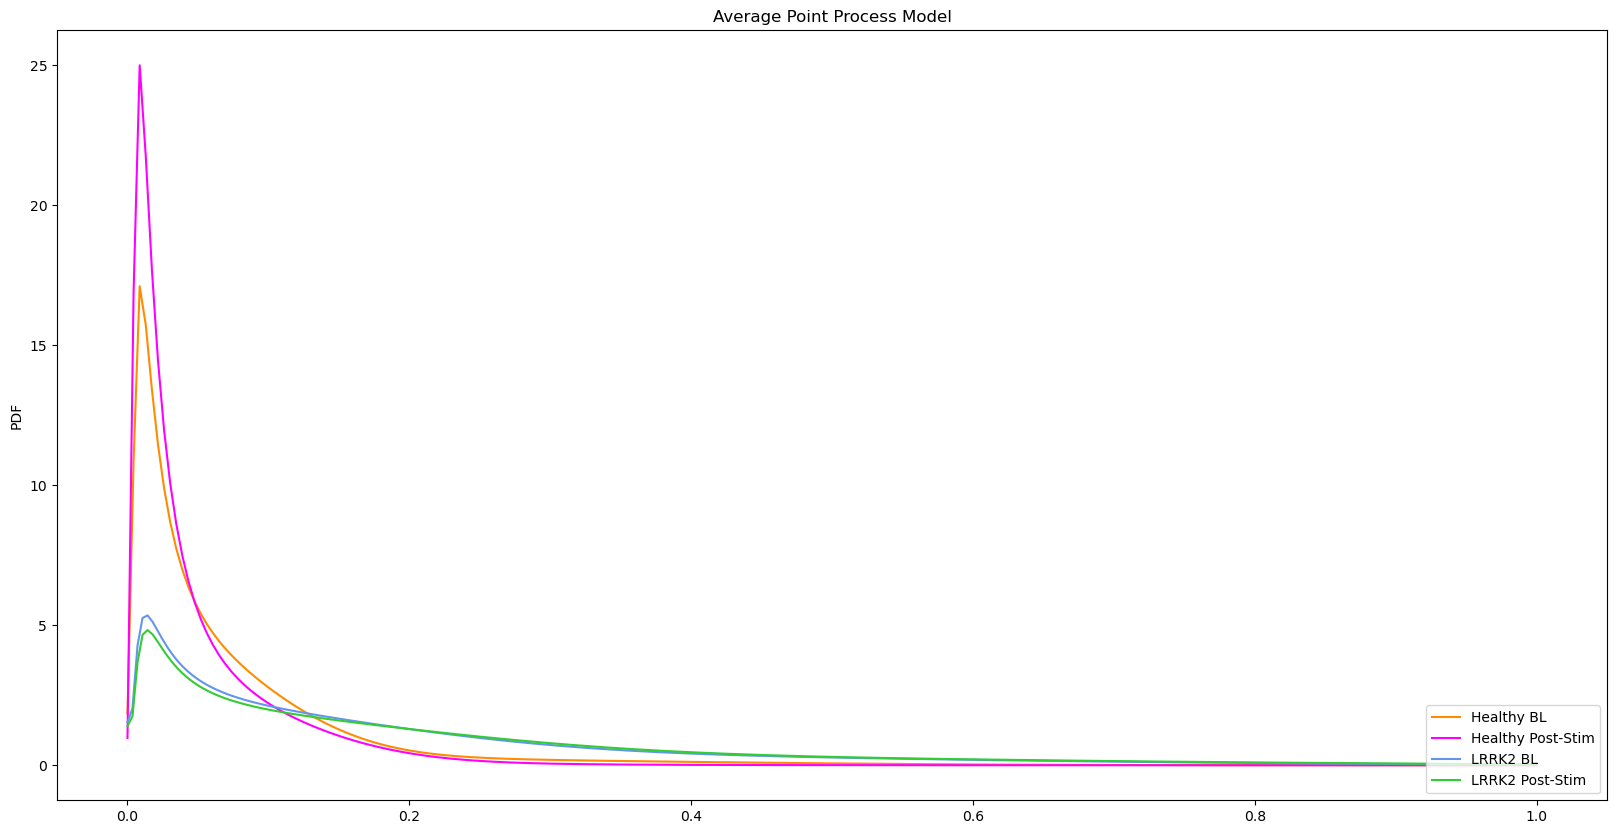

In [64]:
data=HEALTHY_BL
plt.figure(figsize=(20, 10))
d= np.linspace(0.00, 1, len(data))
w1_hb, std_w1_hb, w2_hb, std_w2_hb, w3_hb, std_w3_hb, mu1_hb, std_mu1_hb, lam1_hb, std_lam1_hb, mu2_hb, std_mu2_hb, sigma2_hb, std_sigma2_hb, mu3_hb, std_mu3_hb, sigma3_hb, std_sigma3_hb, pdf=param_distr(data)
plt.plot(d,pdf, color='darkorange', label='Healthy BL')
data=HEALTHY_ST
w1_hs, std_w1_hs, w2_hs, std_w2_hs, w3_hs, std_w3_hs, mu1_hs, std_mu1_hs, lam1_hs, std_lam1_hs, mu2_hs, std_mu2_hs, sigma2_hs, std_sigma2_hs, mu3_hs, std_mu3_hs, sigma3_hs, std_sigma3_hs, pdf=param_distr(data)
plt.plot(d,pdf, color='magenta', label='Healthy Post-Stim')
data=LRRK2_BL
d= np.linspace(0.00, 1, len(data))
w1_lb, std_w1_lb, w2_lb, std_w2_lb, w3_lb, std_w3_lb, mu1_lb, std_mu1_lb, lam1_lb, std_lam1_lb, mu2_lb, std_mu2_lb, sigma2_lb, std_sigma2_lb, mu3_lb, std_mu3_lb, sigma3_lb, std_sigma3_lb, pdf=param_distr(data)
plt.plot(d,pdf, color='cornflowerblue', label='LRRK2 BL')
data=LRRK2_ST
w1_ls, std_w1_ls, w2_ls, std_w2_ls, w3_ls, std_w3_ls, mu1_ls, std_mu1_ls, lam1_ls, std_lam1_ls, mu2_ls, std_mu2_ls, sigma2_ls, std_sigma2_ls, mu3_ls, std_mu3_ls, sigma3_ls, std_sigma3_ls, pdf=param_distr(data)
plt.plot(d,pdf, color='limegreen', label='LRRK2 Post-Stim')
plt.title('Average Point Process Model')
plt.ylabel('PDF')
plt.legend(loc='lower right')
#plt.savefig('meavaluedistributions.jpg')
plt.show()

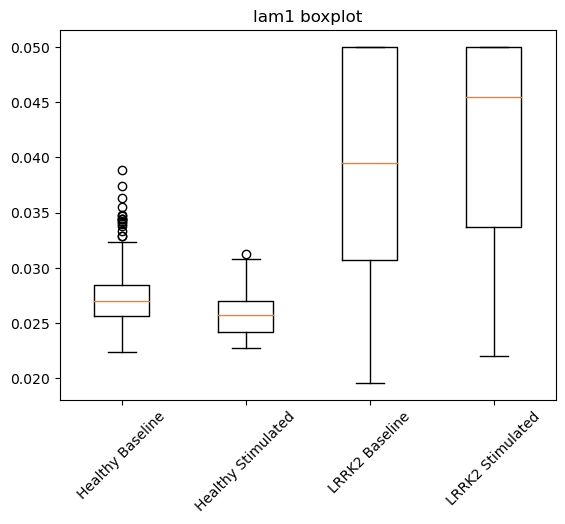

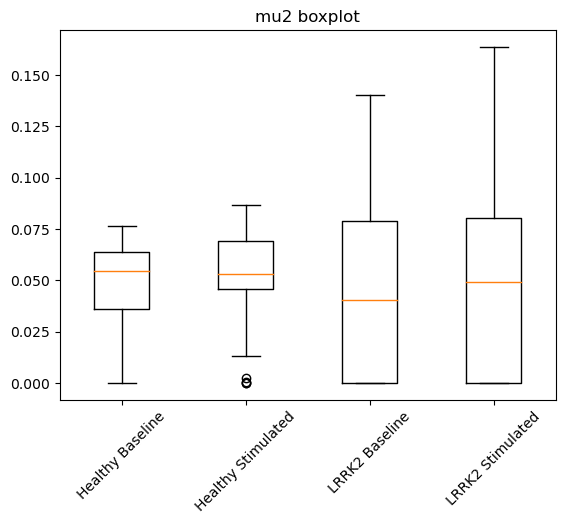

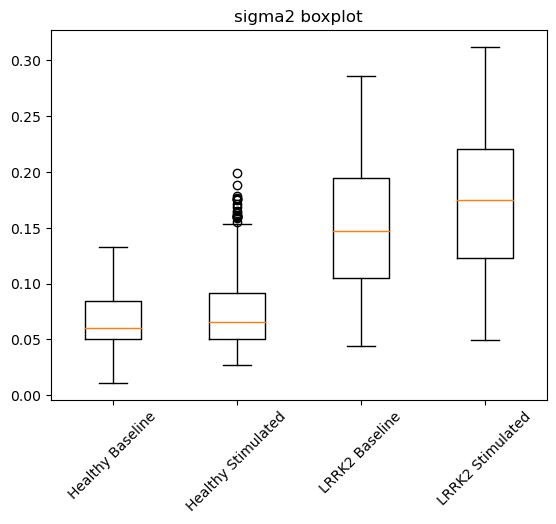

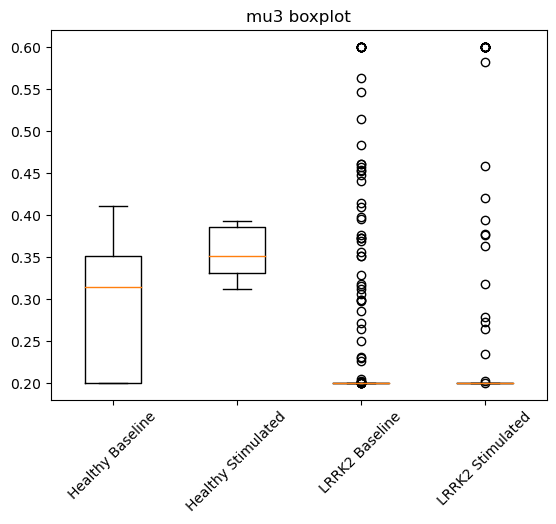

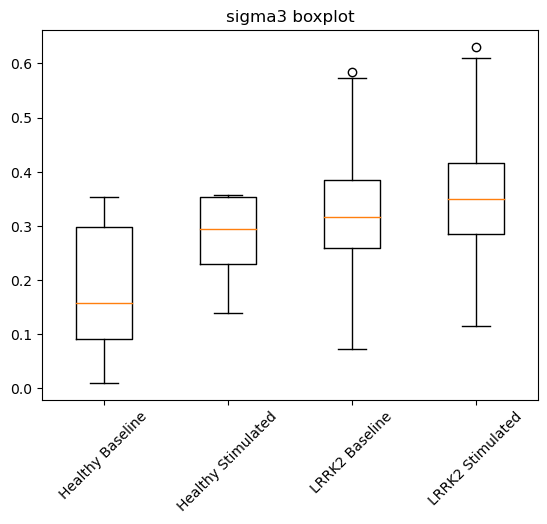

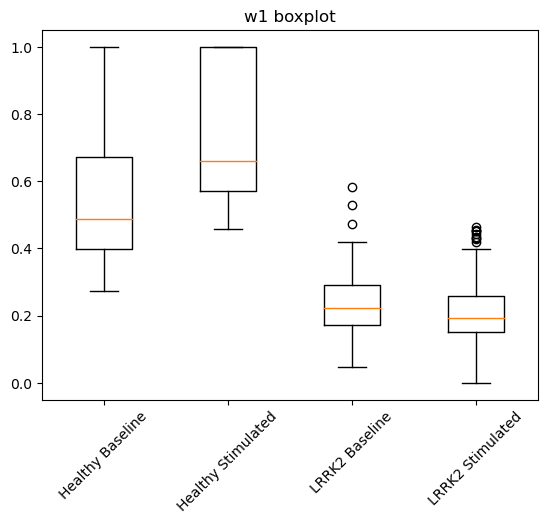

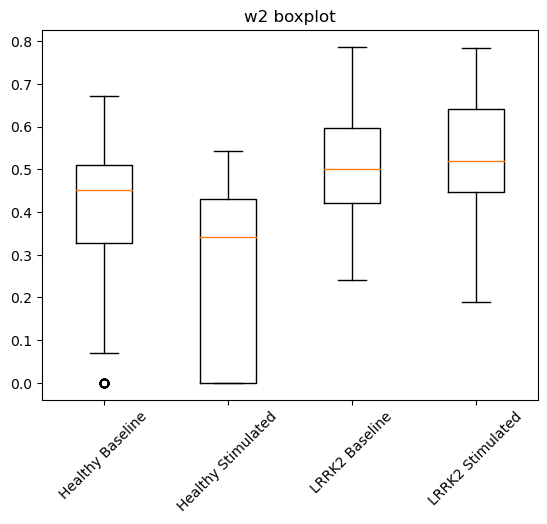

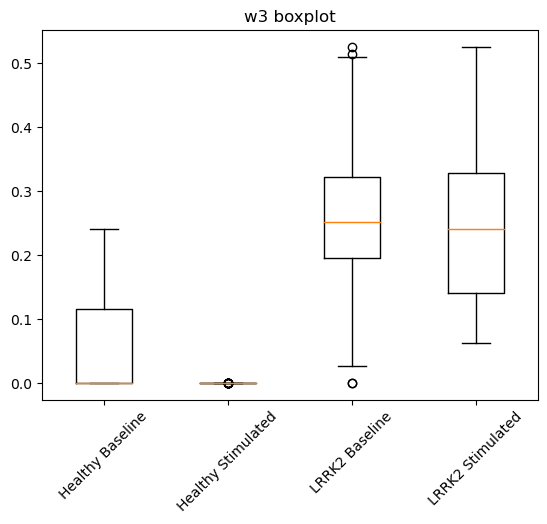

In [96]:
data_boxplots(HEALTHY_BL,HEALTHY_ST,LRRK2_BL,LRRK2_ST)

In [95]:
import matplotlib.pyplot as plt

def data_boxplots(healthy_bl, healthy_st, lrrk2_bl, lrrk2_stim):
    datasets = [healthy_bl, healthy_st, lrrk2_bl, lrrk2_stim]
    labels = ['Healthy Baseline', 'Healthy Stimulated', 'LRRK2 Baseline', 'LRRK2 Stimulated']
    
    num_columns = len(healthy_bl.columns)
    for i in range(1,num_columns-3):
        column=healthy_bl.columns[i]
        data = [dataset[column] for dataset in datasets]
        plt.boxplot(data, labels=labels)
        plt.title(f'{column} boxplot')
        plt.xticks(rotation=45)
        plt.savefig(f'{column}_boxplot.jpg')
        plt.show()
    

In [63]:
def param_distr(data):
    import scipy.stats as st
    mean_w1='{:.4f}'.format(np.mean(data['w1']))
    w1=np.mean(data['w1'])
    std_w1=np.std(data['w1'])
    print('w1: ',mean_w1,'±','{:.4f}'.format(std_w1))

    mean_w2='{:.4f}'.format(np.mean(data['w2']))
    w2=np.mean(data['w2'])
    std_w2=np.std(data['w2'])
    print('w2: ',mean_w2,'±','{:.4f}'.format(std_w2))

    mean_w3='{:.4f}'.format(np.mean(data['w3']))
    w3=np.mean(data['w3'])
    std_w3=np.std(data['w3'])
    print('w3: ',mean_w3,'±','{:.4f}'.format(std_w3))


    mean_mu1='{:.4f}'.format(np.mean(data['mu1']))
    mu1=np.mean(data['mu1'])
    std_mu1=np.std(data['mu1'])
    print('mu1: ',mean_mu1,'±','{:.4f}'.format(std_mu1))

    mean_lambda='{:.4f}'.format(np.mean(data['lam1']))
    lam1=np.mean(data['lam1'])
    std_lam1=np.std(data['lam1'])
    print('lambda: ',mean_lambda,'±','{:.4f}'.format(std_lam1))

    mean_mu2='{:.4f}'.format(np.mean(data['mu2']))
    mu2=np.mean(data['mu2'])
    std_mu2=np.std(data['mu2'])
    print('mu2: ',mean_mu2,'±','{:.4f}'.format(std_mu2))

    mean_sigma2='{:.4f}'.format(np.mean(data['sigma2']))
    sigma2=np.mean(data['sigma2'])
    std_sigma2=np.std(data['sigma2'])
    print('sigma2: ',mean_sigma2,'±','{:.4f}'.format(std_sigma2))

    mean_mu3='{:.4f}'.format(np.mean(data['mu3']))
    mu3=np.mean(data['mu3'])
    std_mu3=np.std(data['mu3'])
    print('mu3: ',mean_mu3,'±','{:.4f}'.format(std_mu3))

    mean_sigma3='{:.4f}'.format(np.mean(data['sigma3']))
    sigma3=np.mean(data['sigma3'])
    std_sigma3=np.std(data['sigma3'])
    print('sigma3: ',mean_sigma3,'±','{:.4f}'.format(std_sigma3))
    
    pdf = w1*st.invgauss.pdf(d, mu1/lam1, scale = lam1) + w2*st.norm.pdf(d, mu2, sigma2) + w3*st.norm.pdf(d, mu3, sigma3)

    #mean_score=np.mean(data['score'])
    #std_score=np.std(data['score'])
    #print('score: ',mean_score,'+/-',std_score)
    # _,_,_,_,_, _, _, _, _,pdf
    return w1, std_w1, w2, std_w2, w3, std_w3, mu1, std_mu1, lam1, std_lam1, mu2, std_mu2, sigma2, std_sigma2, mu3, std_mu3, sigma3, std_sigma3, pdf
    #return pdf